# 케라스 모델 만드는 방법

## Sequential 모델

### 7-1

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### 7-2

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
# 여기서 summary()를 해봤는데 에러가 난다. build 메서드를 호출 하기 전에는 summary 메서드 호출이 불가

### 7-4

In [5]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.22194451, -0.25931036, -0.19071332, -0.14757802, -0.22411583,
         -0.00274268,  0.1452058 , -0.15788679, -0.06106791,  0.14621508,
          0.03414237, -0.10568352,  0.03055519,  0.0417217 , -0.12742494,
          0.0684281 , -0.12203492,  0.25167692,  0.23038691,  0.23833728,
          0.0926196 , -0.10030228,  0.12258607, -0.10568866, -0.16835582,
          0.06213549, -0.03305492,  0.13493162,  0.19571343,  0.1484172 ,
          0.13544339,  0.21171391, -0.29413757, -0.19509435,  0.00664186,
         -0.21475491,  0.13804108,  0.2820418 ,  0.09512076, -0.2798221 ,
          0.26242185, -0.16775785, -0.10208419, -0.02303773, -0.05152291,
          0.22777408,  0.11583468, -0.10906203, -0.23112579,  0.26727754,
         -0.14222461, -0.10417481, -0.20828933, -0.296822  ,  0.16000596,
          0.0696243 ,  0.13503665,  0.12480149,  0.10826701, -0.1310929 ,
         -0.2728206 , -0.2526795 ,  0.21936

### 7-5

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7-6

In [7]:
model = keras.Sequential(name="내 모델")
model.add(layers.Dense(64, activation="relu", name="1floor"))
model.add(layers.Dense(10, activation="softmax", name="2floor"))
model.build((None, 3))
model.summary()

Model: "내 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1floor (Dense)               (None, 64)                256       
_________________________________________________________________
2floor (Dense)               (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 명에는 한글이 들어가도 되는데, add 메서드 안의 layer name으로는 한글이 못들어가는 듯 하다.

### 7-7 

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [10]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
# input layer를 사용하면 summary를 바로 활용할 수 있다.

In [12]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 함수형 API

### 7-8

In [13]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
outputs.shape

TensorShape([None, 10])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7-9

In [16]:
vocab = 10000
num_tags = 100
num_departm = 4 

title = keras.Input(shape=(vocab,), name="title")
text_body = keras.Input(shape=(vocab,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departm, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])



### 7-10

In [17]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocab))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departm))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 7ms/step - loss: 46.7357 - priority_loss: 0.3327 - department_loss: 46.4030 - priority_mean_absolute_error: 0.5003 - department_accuracy: 0.1203


In [18]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"text_body": text_body_data, "title": title_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "tags": tags_data, "text_body": text_body_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"text_body": text_body_data, "title": title_data, "tags": tags_data})

40/40 [==============================] - 0s 7ms/step - loss: 51.1718 - priority_loss: 0.3321 - department_loss: 50.8397 - priority_mean_absolute_error: 0.4996 - department_accuracy: 0.5688


In [19]:
# 입출력이 굉장히 많은 경우, 순서를 하나하나 지켜가면서 추가하기 어려우니까 쓰는 방법

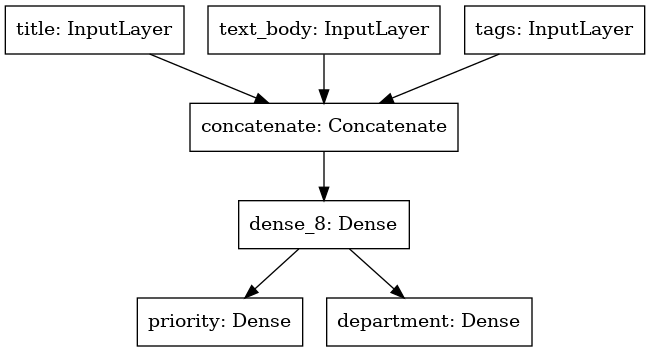

In [20]:
keras.utils.plot_model(model, "ticket_classifier.png")

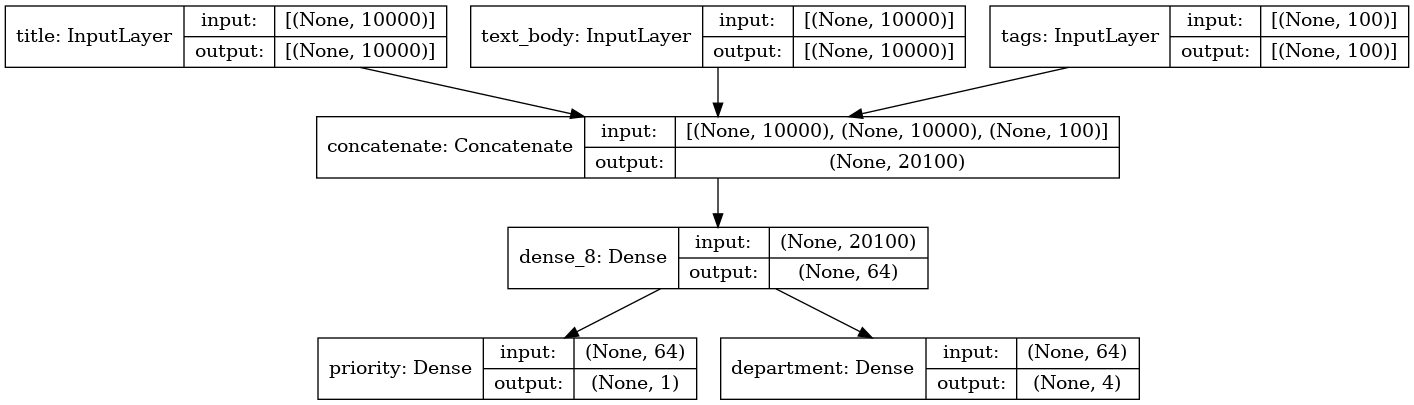

In [21]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [22]:
model.layers

In [23]:
model.layers[0].input

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [24]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>

### 7-13

In [25]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

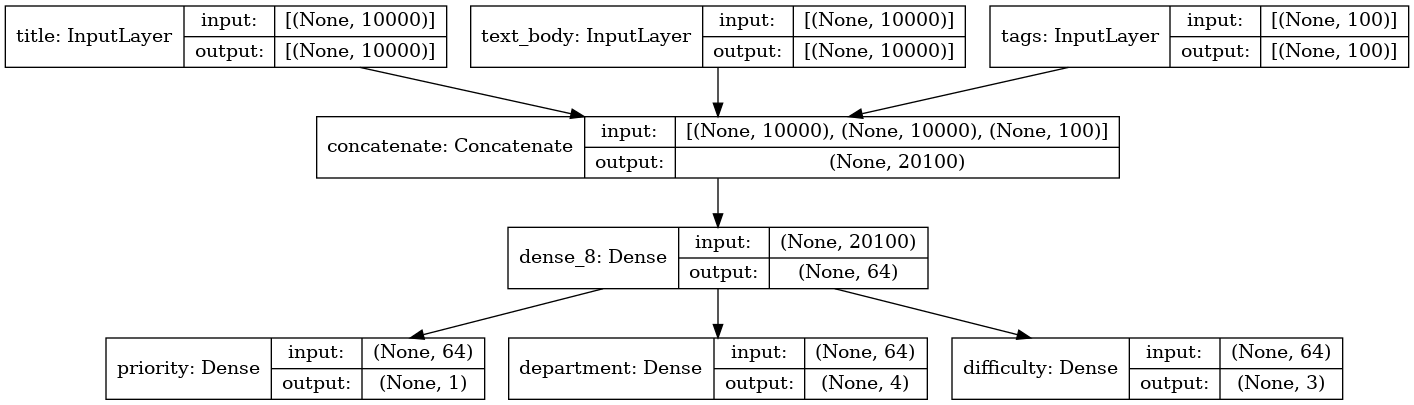

In [26]:
keras.utils.plot_model(new_model, "ticket_classifier_with_shape_info.png", show_shapes=True)

### 7-14

In [27]:
class CustomerTicketModel(keras.Model):   # keras.Model 클래스를 상속받음. keras.Model이 갖는 모든 속성과 메서드를 사용할 수 있게 된다.

    def __init__(self, num_departments):
        super().__init__()    # 상속받은 클래스의 init 초기화 method를 수행한다.
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department  # forward passing
    
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})


model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 28.0537 - output_1_loss: 0.3321 - output_2_loss: 27.7216 - output_1_mean_absolute_error: 0.4996 - output_2_accuracy: 0.0688


### 7-15

In [28]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)   # 이진 분류와 다중 분류 구분

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)   
model = keras.Model(inputs=inputs, outputs=outputs)

In [29]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 7-17

In [30]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2913 - accuracy: 0.9146 - val_loss: 0.1468 - val_accuracy: 0.9579
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1638 - accuracy: 0.9532 - val_loss: 0.1237 - val_accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9722


### 7-18

In [31]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [32]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2983 - accuracy: 0.9111 - rmse: 7.1778 - val_loss: 0.1498 - val_accuracy: 0.9576 - val_rmse: 7.3627
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1628 - accuracy: 0.9546 - rmse: 7.3573 - val_loss: 0.1302 - val_accuracy: 0.9665 - val_rmse: 7.4030
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9689 - rmse: 7.4337


### 7-19 Early stopping 과 ModelCheckpoint 

In [33]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2933 - accuracy: 0.9140 - val_loss: 0.1565 - val_accuracy: 0.9551
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1656 - accuracy: 0.9543 - val_loss: 0.1198 - val_accuracy: 0.9676
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1384 - accuracy: 0.9616 - val_loss: 0.1139 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1273 - accuracy: 0.9678 - val_loss: 0.1175 - val_accuracy: 0.9722
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1187 - accuracy: 0.9703 - val_loss: 0.1164 - val_accuracy: 0.9730
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1116 - accuracy: 0.9727 - val_loss: 0.1111 - val_accuracy: 0.9751
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1075 - accuracy: 0.9750 - val_loss: 0.1111 - val_ac

In [34]:
model = keras.models.load_model("checkpoint_path.h5")

### 7-20 Callback 클래스를 상속하여 사용자 정의 콜백 만들기

In [35]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2980 - accuracy: 0.9115 - val_loss: 0.1402 - val_accuracy: 0.9596
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1689 - accuracy: 0.9524 - val_loss: 0.1231 - val_accuracy: 0.9648
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1381 - accuracy: 0.9623 - val_loss: 0.1175 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1275 - accuracy: 0.9671 - val_loss: 0.1130 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1187 - accuracy: 0.9700 - val_loss: 0.1074 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1136 - accuracy: 0.9727 - val_loss: 0.1088 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1074 - accuracy: 0.9741 - val_loss: 0.1152 - val_accur

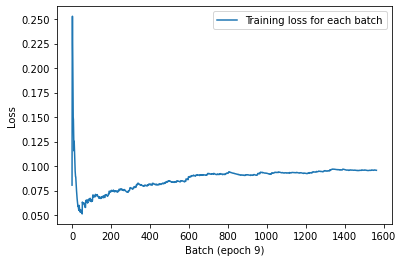

In [36]:
import matplotlib.pyplot as plt
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드 활용해서 시각화 하기

In [37]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2956 - accuracy: 0.9130 - val_loss: 0.1546 - val_accuracy: 0.9569
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1656 - accuracy: 0.9531 - val_loss: 0.1256 - val_accuracy: 0.9673
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1394 - accuracy: 0.9616 - val_loss: 0.1145 - val_accuracy: 0.9710
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1267 - accuracy: 0.9681 - val_loss: 0.1182 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1149 - accuracy: 0.9716 - val_loss: 0.1071 - val_accuracy: 0.9754
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1097 - accuracy: 0.9719 - val_loss: 0.1134 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1054 - accuracy: 0.9743 - val_loss: 0.1055 - val_acc

In [38]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

## 사용자 정의 훈련, 평가 루프 만들기

### 측정 지표의 저수준 사용법

In [40]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

'''
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]는 각각 클래스 0, 클래스 1, 클래스 2에 대한 예측 확률 분포를 나타냅니다. 
여기서 keras.metrics.SparseCategoricalAccuracy 메트릭은 가장 큰 값을 가지는 인덱스를 예측된 클래스로 간주합니다.
metric.update_state(targets, predictions)는 실제 값과 예측된 값을 사용하여 메트릭의 상태를 업데이트합니다.
current_result = metric.result()는 현재까지의 정확도를 계산하여 반환합니다. 
'''

결과: 1.00


'\npredictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]는 각각 클래스 0, 클래스 1, 클래스 2에 대한 예측 확률 분포를 나타냅니다. \n여기서 keras.metrics.SparseCategoricalAccuracy 메트릭은 가장 큰 값을 가지는 인덱스를 예측된 클래스로 간주합니다.\nmetric.update_state(targets, predictions)는 실제 값과 예측된 값을 사용하여 메트릭의 상태를 업데이트합니다.\ncurrent_result = metric.result()는 현재까지의 정확도를 계산하여 반환합니다. \n'

In [41]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 완전한 훈련과 평가 루프

### 7-21 단계별 훈련 루프 작성하기: 훈련 스텝 함수

In [42]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

### 7-22 단계별 훈련 루프 작성하기: 지표 재설정

In [43]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

### 7-23 단계별 훈련 루프 작성하기: 훈련 루프 자체

In [44]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9143
...loss: 0.2920
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9535
...loss: 0.1650
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9629
...loss: 0.1389


### 7-24 단계별 평가 루프 작성하기

In [45]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9656
...val_loss: 0.1364


### tf.function으로 성능 높이기

In [46]:
@tf.function # 이것만 함수 앞에 추가
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9656
...val_loss: 0.1364


### 7-26 fit()이 사용할 사용자 정의 훈련 스텝 구현하기

In [47]:
## 오버라이딩이란 상속받은 부모 클래스의 메소드를 재정의하여 사용하는 것

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [48]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2965
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1639
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1358


In [49]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [50]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2955 - sparse_categorical_accuracy: 0.9127
Epoch 2/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1665 - sparse_categorical_accuracy: 0.9527
Epoch 3/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1381 - sparse_categorical_accuracy: 0.9632


---------------------
1. Python class 구조에 익숙해질 정도로 더 공부해야할 필요성을 느꼈다.
2. with 문도 다시 한번 꼼꼼히 살펴봐야 GradientTape를 완전히 이해할 수 있어보인다.
3. 사용자 정의 루프는 한번 더 구현해보자
4. 이론은 충분하니 코딩이랑 코드 읽는 실력도 따라와야 할 듯

### 발표 내용 간단 정리

1. sigmoid는 hidden layer가 4가 넘어가면 학습이 안되기 시작했다.
2. 데이터가 복잡하지 않으면 과적합 될 가능성이 있지만 , layer가 많을수록 수렴속도가 빨라진다.
3. 2번은 일반 네트워크 뿐만 아니라 CNN에서도 마찬가지였다.
4. 데이터의 복잡한 정도에 따라서 모델도 적당히 복잡하게 만들어야 할 것 같다. 